# Home Assignment 3

In [4]:
# pip install PrettyTable
#pip install tabulate

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # enable showing all columns of the df

## 1. Data pre-processing

### 1.1 Data Loading

In [117]:
### Loading the data ###

X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

### 1.2. Exploratory Data Analysis

In [118]:
### Convert to pandas dataframe ###

X_train_df = pd.DataFrame(X_train, columns=col_names)
Y_train_df = pd.DataFrame(y_train, columns=['Molecular Activity'])
Y_ivs_df = pd.DataFrame(X_ivs, columns=col_names)

In [119]:
### Check dimensions ###

print("X_train_df.shape: ", X_train_df.shape)
print("Y_train_df.shape: ", Y_train_df.shape)
print("Y_ivs_df.shape: ", Y_ivs_df.shape)

X_train_df.shape:  (7337, 2132)
Y_train_df.shape:  (7337, 1)
Y_ivs_df.shape:  (816, 2132)


In [91]:
### View the data - X_train ###

X_train_df.head()

D00       D01   D02   D03   D04   D05   D06    D07    D08   D09  \
0   541.280138   541.656  10.0   1.0   8.0   1.0  10.0   40.0   75.0  10.0   
1   426.197714   426.582   5.0   1.0   9.0   1.0   4.0   30.0   60.0   6.0   
2   348.183778   348.446   4.0   0.0   3.0   0.0   3.0   26.0   50.0   4.0   
3  1455.763803  1456.831  27.0  19.0  23.0  17.0  16.0  105.0  206.0  28.0   
4   387.151368   387.886   4.0   0.0   4.0   0.0   4.0   27.0   50.0   6.0   

   D10       D11   D12  D13  D14  D15  D16  D17  D18  D19  D20  D21   D22  \
0  0.0  0.366667   6.0  5.0  1.0  1.0  4.0  3.0  1.0  1.0  0.0  0.0   0.0   
1  0.0  0.333333   3.0  3.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   1.0   
2  0.0  0.363636   4.0  2.0  2.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   1.0   
3  8.0  0.454545  10.0  7.0  3.0  2.0  5.0  3.0  2.0  2.0  0.0  0.0  12.0   
4  0.0  0.428571   4.0  2.0  2.0  1.0  2.0  1.0  1.0  1.0  0.0  0.0   1.0   

   D23         D24     D25      D26       D27        D28        D29  \
0  0.0  231.488913   92.94  3.05150  157.2168  23.031669  13.918232   
1  0.0  179.173066   62.40  5.06700  121.4485  18.868877  11.924618   
2  1.0  154.056480   41.90  4.34520  102.5950  15.149717   9.339378   
3  0.0  615.328380  420.92  2.83877  404.3975  60.413438  37.662847   
4  1.0  163.495895   36.44  3.83150  105.0585  15.960053   9.892722   

         D30        D31        D32        D33        D34        D35  \
0   8.076785   8.076785   5.801320  23.031669  13.918232   8.076785   
1   7.288243   7.288243   4.537164  18.052380  10.272353   5.555996   
2   5.227266   5.227266   3.910611  15.149717   9.339378   5.227266   
3  21.277605  21.277605  15.539352  59.596941  36.508147  20.077699   
4   5.811508   5.811508   4.211670  15.204124   9.514758   5.587930   

         D36        D37   D38        D39        D40        D41        D42  \
0   8.076785   5.801320 -4.31  25.940585  10.689861   4.577007   6.932531   
1   5.555996   3.631044 -2.57  22.122775   9.493882   4.766210   7.001034   
2   5.227266   3.910611 -2.62  16.827325   7.321446   3.641782   4.738475   
3  20.077699  14.535672 -9.87  77.735944  38.232130  21.871193  28.304864   
4   5.587930   4.099881 -1.98  18.386415   7.947481   4.143126   5.412062   

   FP0000  FP0001  FP0002  FP0003  FP0004  FP0005  FP0006  FP0007  FP0008  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   FP0009  FP0010  FP0011  FP0012  FP0013  FP0014  FP0015  FP0016  FP0017  \
0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   FP0018  FP0019  FP0020  FP0021  FP0022  FP0023  FP0024  FP0025  FP0026  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   

   FP0027  FP0028  FP0029  FP0030  FP0031  FP0032  FP0033  FP0034  FP0035  \
0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0

In [92]:
### View the data - X_ivs ###

Y_train_df.head()

Molecular Activity
0            0.654947
1            0.649995
2            0.154947
3            0.616176
4            0.359725

In [93]:
### Descriptive statistics of X_train ###

X_train_df.describe()

D00          D01          D02          D03          D04  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean    430.518010   431.037078     5.430285     1.206897     6.527327   
std     181.613020   181.757699     4.160569     2.527815     5.983082   
min     135.068414   135.166000     1.000000     0.000000     0.000000   
25%     357.124405   357.429000     4.000000     0.000000     4.000000   
50%     419.107040   419.500000     5.000000     1.000000     6.000000   
75%     472.228141   472.888000     6.000000     1.000000     8.000000   
max    3768.848446  3771.262000    92.000000    47.000000   137.000000   

               D05          D06          D07          D08          D09  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      1.128799     4.678070    30.497615    59.165190     6.594930   
std       2.218665     2.789156    12.882724    25.749585     4.403703   
min       0.000000     0.000000    10.000000    19.000000     1.000000   
25%       0.000000     3.000000    25.000000    49.000000     5.000000   
50%       1.000000     4.000000    30.000000    57.000000     6.000000   
75%       1.000000     6.000000    33.000000    65.000000     8.000000   
max      42.000000    58.000000   266.000000   527.000000    93.000000   

               D10          D11          D12          D13          D14  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.610740     0.412880     4.157285     2.570806     1.586479   
std       1.362184     0.132115     1.199923     1.018602     0.867549   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.333333     4.000000     2.000000     1.000000   
50%       0.000000     0.400000     4.000000     3.000000     1.000000   
75%       1.000000     0.480000     5.000000     3.000000     2.000000   
max      30.000000     1.000000    14.000000     9.000000    11.000000   

               D15          D16          D17          D18          D19  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      1.052746     2.006678     0.746899     0.868202     1.259779   
std       0.783258     0.974223     0.814518     0.594819     0.683070   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     0.000000     1.000000     1.000000   
50%       1.000000     2.000000     1.000000     1.000000     1.000000   
75%       1.000000     3.000000     1.000000     1.000000     2.000000   
max      11.000000     9.000000     4.000000     7.000000     7.000000   

               D20          D21          D22          D23          D24  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.034074     0.048249     0.682704     0.249421   182.840951   
std       0.181431     0.357754     1.587992     0.615764    74.961926   
min       0.000000     0.000000     0.000000     0.000000    59.499552   
25%       0.000000     0.000000     0.000000     0.000000   152.940004   
50%       0.000000     0.000000     0.000000     0.000000   178.194506   
75%       0.000000     0.000000     1.000000     0.000000   198.927877   
max       1.000000     8.000000    29.000000    10.000000  1542.223628   

               D25          D26          D27          D28          D29  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     58.256788     4.093037   120.864912    18.221373    11.270109   
std      62.670539     1.400085    48.037139     7.427662     4.561994   
min       3.240000   -10.523160    40.300500     5.593478     3.306776   
25%      35.580000     3.273420   101.437500    15.166474     9.256720   
50%      50.800000     4.074700   117.723700    17.737779    10.962982   
75%      67.350000     4.836300   131.143700    19.856444    12.356276   
max    1365.490000    16.768600   957.020500   150.889493    89.019955   

             

In [94]:
### Descriptive statistics of y_train ###

Y_train_df.describe()

Molecular Activity
count         7337.000000
mean             0.388388
std              0.276656
min              0.000000
25%              0.169187
50%              0.382177
75%              0.581929
max              1.000000

In [171]:
### Check for missing values in X_train ###

missing_values = X_train_df.isnull().sum().sum()
print("Missing values in X_train:", missing_values)

Missing values in X_train: 0


In [174]:
### Check for missing values in X_ivs ###

X_ivs_df = pd.DataFrame(X_ivs, columns=col_names)
missing_values = X_ivs_df.isnull().sum().sum()
print("Missing values in X_ivs:", missing_values)

Missing values in X_ivs: 0


In [173]:
### Check how many features have only zeroes in X_train###

zero_columns = (X_train_df == 0).all(axis=0).sum()
print("Features that only have zero values in X_train:", zero_columns)

Features that only have zero values in X_train: 0


In [176]:
### Check how many features have only zeroes in X_ivs ###

zero_columns = (X_ivs_df == 0).all(axis=0).sum()
print("Features that only have zero values in X_ivs:", zero_columns)

Features that only have zero values in X_ivs: 0


Note to group: Should we consider removing some of the features that have 98-99% of zeroes? 

In [98]:
### Check how many features have at least 98% of zeroes ###

# Threshold percentage
threshold_percentage = 98

# Calculate the percentage of zero values for each feature
zero_percentages = (np.sum(X_train_df == 0, axis=0) / X_train_df.shape[0]) * 100

# Identify features with at least 90% zero values
high_zero_features = np.where(zero_percentages >= threshold_percentage)[0]

print (f"The number of features with at least {threshold_percentage}% zero values in X_train:", len(high_zero_features))
#print(f"Features with at least {threshold_percentage}% zero values in X_train:", high_zero_features)


The number of features with at least 98% zero values in X_train: 826


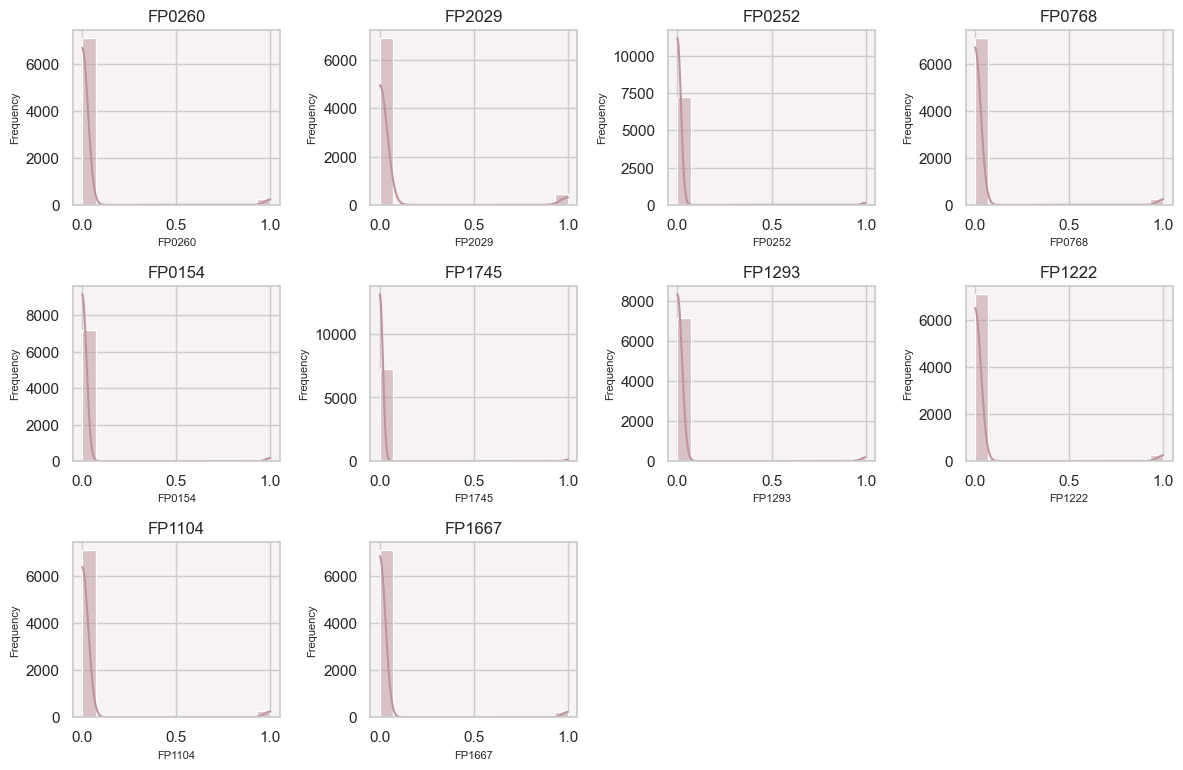

In [99]:
### Check the distribution of some ot the X_train features ###

# Select 10 columns and 10 rows to plot
X_train_df_sample = X_train_df.sample(n=10, axis=1)

# Plot the histograms using seaborn
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f7f2f3"}) # set background color
plt.figure(figsize=(12, 10))
for i, column in enumerate(X_train_df_sample.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(X_train_df_sample[column], kde=True, color='#bd949b')
    plt.title(column, fontsize=12)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

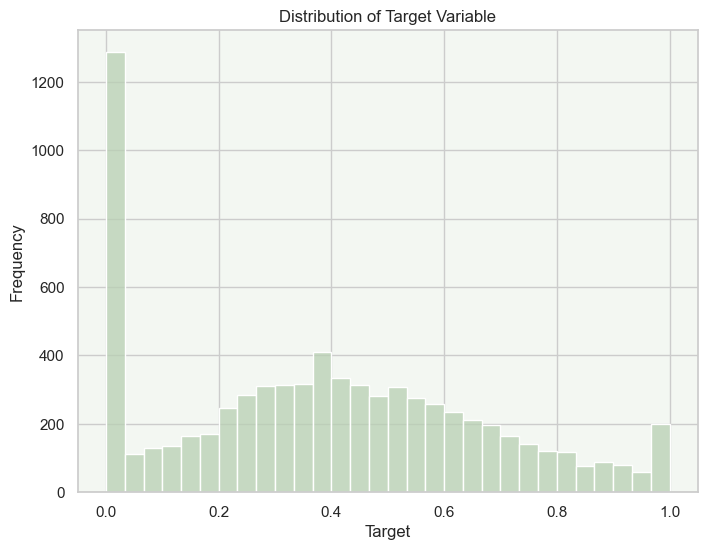

In [100]:
### Check the distribution of the target variable ###

# Plot histogram using Seaborn
sns.set_theme(style="whitegrid", rc={"axes.facecolor": "#f3f7f2"}) # set the background color
plt.figure(figsize=(8, 6))
sns.histplot(data=Y_train_df, x='Molecular Activity', color='#b8d0b3', bins=30)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [55]:
### Detect Outliers in the data with Isolation Forest ###

from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(X_train)
outliers = clf.predict(X_train_df)
print("Number of outliers:", len(outliers[outliers == -1]))


Number of outliers: 16


### 1.3. Data Pre-processing

Scaling is necessary for some algorithms, but not for others. For example, decision trees and random forests do not require scaling, but support vector machines (SVMs) and k-nearest neighbors (KNN) do.
Because the dataset contains features with different scales, we will standardize the numerical features.

### 1.3.1. Feature Selection???

In [57]:
### Removing features with high percentage of zero values - 98% Threshold ###

# Threshold percentage
threshold_percentage = 98

# Calculate the percentage of zero values for each feature
zero_percentages = (np.sum(X_train_df == 0, axis=0) / X_train.shape[0]) * 100

# Identify features with at least 98% zero values
high_zero_features = np.where(zero_percentages >= threshold_percentage)[0]

# Remove features with at least 98% zero values
X_train_98_nozeros = np.delete(X_train, high_zero_features, axis=1)

# Print the number of features before and after removing features with at least 98% zero values
print("Number of features before removing features with at least 98% zero values:", X_train.shape[1])
print("Number of features after removing features with at least 98% zero values:", X_train_98_nozeros.shape[1])

Number of features before removing features with at least 98% zero values: 2132
Number of features after removing features with at least 98% zero values: 1306


In [58]:
### Removing features with high percentage of zero values - 95% Threshold###

# Threshold percentage
threshold_percentage = 95

# Calculate the percentage of zero values for each feature
zero_percentages = (np.sum(X_train == 0, axis=0) / X_train.shape[0]) * 100

# Identify features with at least 98% zero values
high_zero_features = np.where(zero_percentages >= threshold_percentage)[0]

# Remove features with at least 98% zero values
X_train_95_nozeros = np.delete(X_train, high_zero_features, axis=1)

# Print the number of features before and after removing features with at least 98% zero values
print("Number of features before removing features with at least 95% zero values:", X_train.shape[1])
print("Number of features after removing features with at least 95% zero values:", X_train_95_nozeros.shape[1])

Number of features before removing features with at least 95% zero values: 2132
Number of features after removing features with at least 95% zero values: 382


### 1.3.2. Scaling

In [120]:
### Scale the data ###

# Standardize the selected features
scaler = StandardScaler()
X_train_df_scaled = pd.DataFrame(scaler.fit_transform(X_train_df), columns=X_train_df.columns)
X_train_df_scaled.describe()


D00           D01           D02           D03           D04  \
count  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03   
mean  -1.954307e-15 -3.306731e-15  2.905313e-18  2.033719e-17 -3.002157e-17   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -1.626919e+00 -1.627943e+00 -1.064899e+00 -4.774791e-01 -1.091038e+00   
25%   -4.041484e-01 -4.050067e-01 -3.437949e-01 -4.774791e-01 -4.224411e-01   
50%   -6.283551e-02 -6.347937e-02 -1.034268e-01 -8.185356e-02 -8.814240e-02   
75%    2.296805e-01  2.302724e-01  1.369414e-01 -8.185356e-02  2.461563e-01   
max    1.838281e+01  1.837860e+01  2.080860e+01  1.811692e+01  2.180842e+01   

                D05           D06           D07           D08           D09  \
count  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03   
mean   1.089492e-17  1.452657e-17  1.045913e-16 -4.309548e-17  8.570674e-17   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -5.088087e-01 -1.677349e+00 -1.591202e+00 -1.559945e+00 -1.270592e+00   
25%   -5.088087e-01 -6.016819e-01 -4.267723e-01 -3.947979e-01 -3.622039e-01   
50%   -5.805653e-02 -2.431260e-01 -3.862915e-02 -8.409214e-02 -1.351068e-01   
75%   -5.805653e-02  4.739857e-01  1.942567e-01  2.266137e-01  3.190873e-01   
max    1.842278e+01  1.911889e+01  1.828173e+01  1.816987e+01  1.962234e+01   

                D10           D11           D12           D13           D14  \
count  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03   
mean   2.251618e-17 -2.046406e-14 -3.108685e-16  6.536954e-18  7.941189e-17   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -4.483842e-01 -3.125379e+00 -3.464861e+00 -2.524029e+00 -1.828816e+00   
25%   -4.483842e-01 -6.021464e-01 -1.310881e-01 -5.604195e-01 -6.760648e-01   
50%   -4.483842e-01 -9.749978e-02 -1.310881e-01  4.213852e-01 -6.760648e-01   
75%    2.857812e-01  5.080761e-01  7.023551e-01  4.213852e-01  4.766862e-01   
max    2.157658e+01  4.444319e+00  8.203345e+00  6.312213e+00  1.085144e+01   

                D15           D16           D17           D18           D19  \
count  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03   
mean   1.162125e-17 -5.229564e-17  6.827486e-17 -1.234758e-16 -1.472025e-16   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -1.344152e+00 -2.059914e+00 -9.170457e-01 -1.459706e+00 -1.844417e+00   
25%   -6.734682e-02 -1.033385e+00 -9.170457e-01  2.215911e-01 -3.803374e-01   
50%   -6.734682e-02 -6.855653e-03  3.107580e-01  2.215911e-01 -3.803374e-01   
75%   -6.734682e-02  1.019673e+00  3.107580e-01  2.215911e-01  1.083742e+00   
max    1.270071e+01  7.178848e+00  3.994169e+00  1.030937e+01  8.404139e+00   

                D20           D21           D22           D23           D24  \
count  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03   
mean   4.406392e-17  3.704274e-17  2.953735e-17 -1.113703e-17  6.812959e-16   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -1.878187e-01 -1.348745e-01 -4.299458e-01 -4.050864e-01 -1.645499e+00   
25%   -1.878187e-01 -1.348745e-01 -4.299458e-01 -4.050864e-01 -3.989090e-01   
50%   -1.878187e-01 -1.348745e-01 -4.299458e-01 -4.050864e-01 -6.198829e-02   
75%   -1.878187e-01 -1.348745e-01  1.998231e-01 -4.050864e-01  2.146159e-01   
max    5.324284e+00  2.222838e+01  1.783335e+01  1.583600e+01  1.813554e+01   

                D25           D26           D27           D28           D29  \
count  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03  7.337000e+03   
mean   7.370537e-15  2.982788e-16  7.628868e-15  9.113967e-15  2.967051e-15   
std    1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00  1.000068e+00   
min   -8.779331e-01 -1.044022e+01 -1.677242e+00 -1.700233e+00 -1.745701e+00   
25%   -3.618659e-01 -5.854450e-01 -4.044524e-01 -4.113147e-01

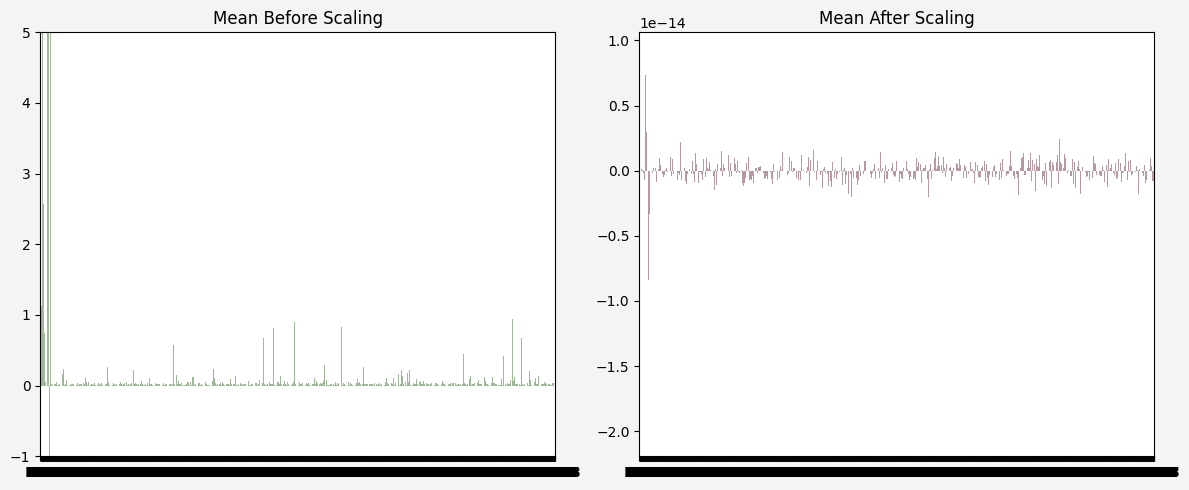

In [122]:
### Check the summary statistics before and after Standardization X_train_df ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train_df, axis=0)
before_summary_std = np.std(X_train_df, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_df_scaled, axis=0)
after_summary_std = np.std(X_train_df_scaled, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Scaling')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Scaling')

plt.tight_layout()
plt.show()

### 1.3.3. Transformation (Log Transformation)

In [123]:
### Log Transform the data ###

X_train_log_transformed = np.log1p(X_train_df)
X_train_log_transformed = pd.DataFrame(X_train_log_transformed, columns=X_train_df.columns)
X_train_log_transformed.describe()

D00          D01          D02          D03          D04  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      6.022207     6.023414     1.769575     0.605896     1.872514   
std       0.273965     0.273995     0.394432     0.526598     0.537753   
min       4.913158     4.913875     0.693147     0.000000     0.000000   
25%       5.880880     5.881731     1.609438     0.000000     1.609438   
50%       6.040510     6.041444     1.791759     0.693147     1.945910   
75%       6.159578     6.160971     1.945910     0.693147     2.197225   
max       8.234790     8.235430     4.532599     3.871201     4.927254   

               D05          D06          D07          D08          D09  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.588583     1.659962     3.407958     4.052654     1.939049   
std       0.505004     0.377300     0.262220     0.267644     0.399944   
min       0.000000     0.000000     2.397895     2.995732     0.693147   
25%       0.000000     1.386294     3.258097     3.912023     1.791759   
50%       0.693147     1.609438     3.433987     4.060443     1.945910   
75%       0.693147     1.945910     3.526361     4.189655     2.197225   
max       3.761200     4.077537     5.587249     6.269096     4.543295   

               D10          D11          D12          D13          D14  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.346870     0.341314     1.615197     1.233197     0.896750   
std       0.445344     0.092768     0.225114     0.284406     0.330744   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.287682     1.609438     1.098612     0.693147   
50%       0.000000     0.336472     1.609438     1.386294     0.693147   
75%       0.693147     0.392042     1.791759     1.386294     1.098612   
max       3.433987     0.693147     2.708050     2.302585     2.484907   

               D15          D16          D17          D18          D19  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.647154     1.044679     0.454875     0.569345     0.766805   
std       0.387461     0.347067     0.449709     0.345873     0.321675   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.693147     0.693147     0.000000     0.693147     0.693147   
50%       0.693147     1.098612     0.693147     0.693147     0.693147   
75%       0.693147     1.386294     0.693147     0.693147     1.098612   
max       2.484907     2.302585     1.609438     2.079442     2.079442   

               D20          D21          D22          D23          D24  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean      0.023618     0.024382     0.350628     0.154196     5.172074   
std       0.125759     0.170244     0.501168     0.329646     0.262763   
min       0.000000     0.000000     0.000000     0.000000     4.102636   
25%       0.000000     0.000000     0.000000     0.000000     5.036563   
50%       0.000000     0.000000     0.000000     0.000000     5.188472   
75%       0.000000     0.000000     0.693147     0.000000     5.297957   
max       0.693147     2.197225     3.401197     2.397895     7.341629   

               D25          D26          D27          D28          D29  \
count  7337.000000  7321.000000  7337.000000  7337.000000  7337.000000   
mean      3.882895     1.598893     4.762607     2.917574     2.469663   
std       0.611804     0.265455     0.257928     0.251249     0.250149   
min       1.444563    -0.582501     3.720875     1.886081     1.460190   
25%       3.599502     1.454000     4.629253     2.782940     2.327933   
50%       3.947390     1.625390     4.776799     2.930542     2.481817   
75%       4.224642     1.764423     4.883890     3.037663     2.591986   
max       7.220001     2.877433     6.864869     5.023153     4.500031   

             

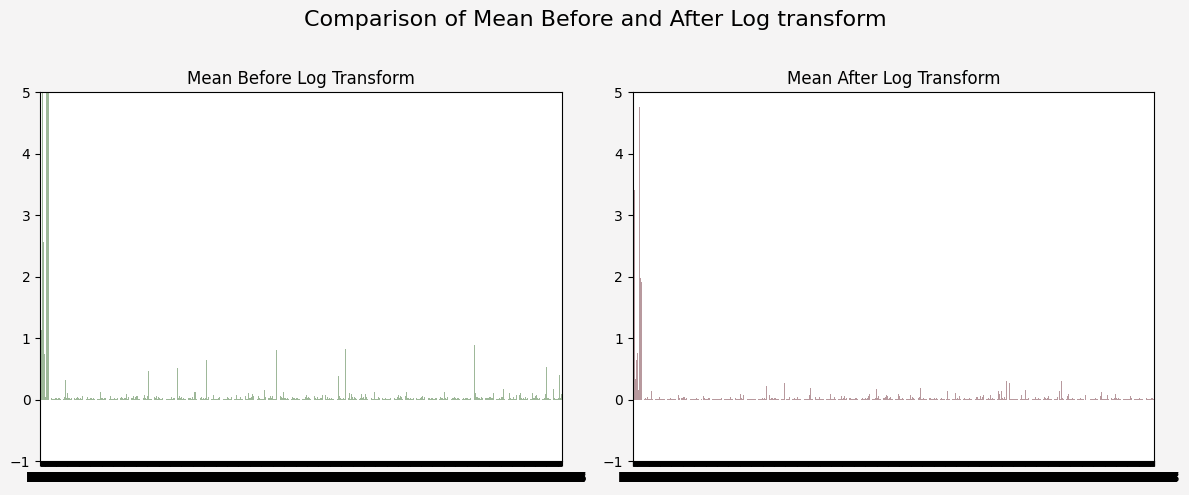

In [139]:
### Check the summary statistics before and after Log Transform ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train, axis=0)
before_summary_std = np.std(X_train, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_log_transformed, axis=0)
after_summary_std = np.std(X_train_log_transformed, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Log Transform')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Log Transform')
plt.ylim(-1,5)

# Add a main title
plt.suptitle('Comparison of Mean Before and After Log transform', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()

### 1.3.3. Transformation (Power Transformation)

In [129]:
### Power Transform the Standardized data ###

pt = PowerTransformer(standardize=False) # because we already standardized the data and there are a lot of zeros
X_train_power_transformed_st = pd.DataFrame(pt.fit_transform(X_train_df_scaled), columns=X_train_df.columns)
X_train_power_transformed_st.describe()

D00          D01          D02          D03          D04  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     -0.167149    -0.167137    -0.175431    -0.192398    -0.164665   
std       0.614494     0.614887     0.568324     0.410267     0.570613   
min      -2.923025    -2.924120    -1.731797    -0.713575    -1.744351   
25%      -0.484462    -0.485584    -0.411643    -0.713575    -0.519188   
50%      -0.064780    -0.065462    -0.109509    -0.088132    -0.092323   
75%       0.207071     0.207572     0.127260    -0.088132     0.218281   
max       3.030351     3.033958     2.532047     1.098045     2.791598   

               D05          D06          D07          D08          D09  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     -0.191103    -0.192754    -0.167131    -0.174250    -0.177905   
std       0.437149     0.732114     0.600786     0.579172     0.646479   
min      -0.751165    -2.829514    -2.880916    -2.939087    -2.042700   
25%      -0.751165    -0.754673    -0.519217    -0.480928    -0.425405   
50%      -0.060932    -0.268440    -0.039385    -0.087966    -0.143920   
75%      -0.060932     0.398281     0.177313     0.202332     0.278209   
max       1.269879     3.698847     2.901378     2.582932     3.182544   

               D10          D11          D12          D13          D14  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     -0.253203    -0.080815    -0.112795    -0.113862    -0.157067   
std       0.484175     0.987125     0.944708     0.960773     0.936073   
min      -0.666449    -3.857078    -4.925244    -3.309239    -2.482112   
25%      -0.666449    -0.639822    -0.134160    -0.609531    -0.776690   
50%      -0.666449    -0.098599    -0.134160     0.395243    -0.776690   
75%       0.224654     0.482537     0.632533     0.395243     0.431617   
max       1.033238     3.465362     4.857679     4.080760     4.989971   

               D15          D16          D17          D18          D19  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     -0.128932    -0.084347    -0.230420    -0.022242    -0.097598   
std       0.951953     0.985661     0.932767     0.996633     0.983412   
min      -1.643441    -2.430166    -1.180107    -1.510710    -2.207171   
25%      -0.068251    -1.140440    -1.180107     0.220081    -0.399512   
50%      -0.068251    -0.006861     0.282748     0.220081    -0.399512   
75%      -0.068251     0.927164     0.282748     0.220081     0.964524   
max       6.305035     5.145364     2.107099     9.243528     5.525629   

               D20          D21          D22          D23          D24  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     -0.799507    -0.777686    -0.319597    -0.667206    -0.166677   
std       0.164446     0.119862     0.477301     0.475997     0.604523   
min      -0.830391    -0.795118    -0.690472    -0.899751    -3.005866   
25%      -0.830391    -0.795118    -0.690472    -0.899751    -0.478779   
50%      -0.830391    -0.795118    -0.690472    -0.899751    -0.063916   
75%      -0.830391    -0.795118     0.161521    -0.899751     0.194363   
max       0.075992     0.046346     0.727344     0.330755     2.936678   

               D25          D26          D27          D28          D29  \
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000   
mean     -0.174682    -0.002575    -0.168758    -0.168600    -0.172560   
std       0.471481     1.000059     0.613425     0.608215     0.633268   
min      -1.486624   -10.583085    -3.071359    -3.153348    -3.203534   
25%      -0.459462    -0.586627    -0.485667    -0.496263    -0.535399   
50%      -0.129223    -0.013099    -0.067520    -0.067239    -0.069523   
75%       0.131698     0.529923     0.194031     0.198897     0.214285   
max       1.725579     8.939846     2.939573     2.921009     3.025137   

             

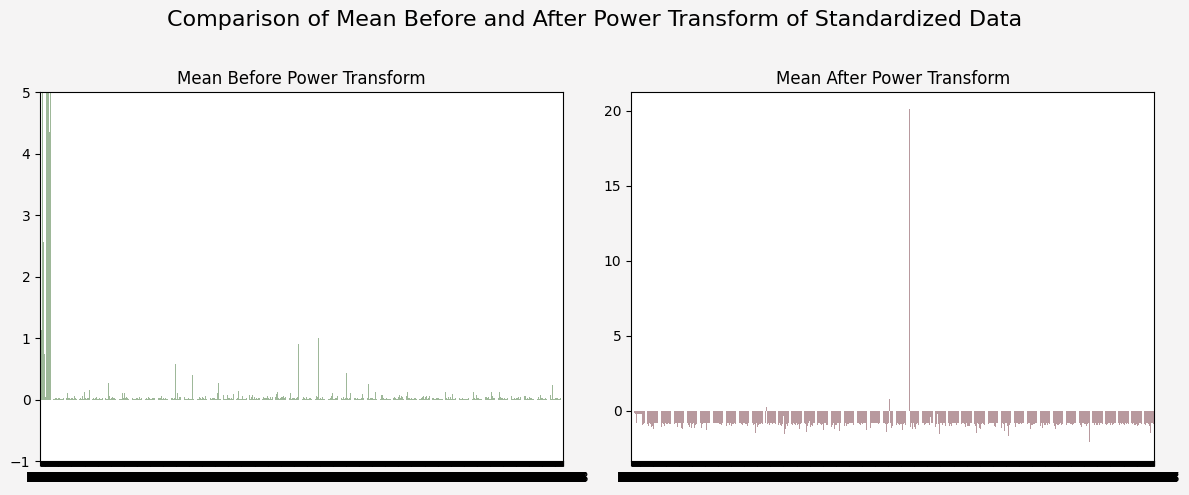

In [137]:
### Check the summary statistics before and after Power Transform ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train_df, axis=0)
before_summary_std = np.std(X_train_df, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_power_transformed_st, axis=0)
after_summary_std = np.std(X_train_power_transformed_st, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Power Transform')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Power Transform')

# Add a main title
plt.suptitle('Comparison of Mean Before and After Power Transform of Standardized Data', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()



In [131]:
### Power Transform the non Standardized data (but with the standardize options off as the data has too many zeroes ###

pt = PowerTransformer(standardize=False) # because the data has a lot of zeros
X_train_power_transformed = pd.DataFrame(pt.fit_transform(X_train_df), columns=X_train_df.columns)
X_train_power_transformed.iloc[:, :5].describe()

D00          D01          D02          D03          D04
count  7337.000000  7337.000000  7337.000000  7337.000000  7337.000000
mean      1.888916     1.892167     1.423664     0.479534     2.158449
std       0.012637     0.012709     0.251788     0.371634     0.686856
min       1.818244     1.821110     0.637474    -0.000000     0.000000
25%       1.882731     1.885929     1.329968     0.000000     1.799694
50%       1.890663     1.893909     1.450162     0.590068     2.228496
75%       1.896177     1.899476     1.547678     0.590068     2.561855
max       1.954029     1.957684     2.736851     1.763896     7.024771

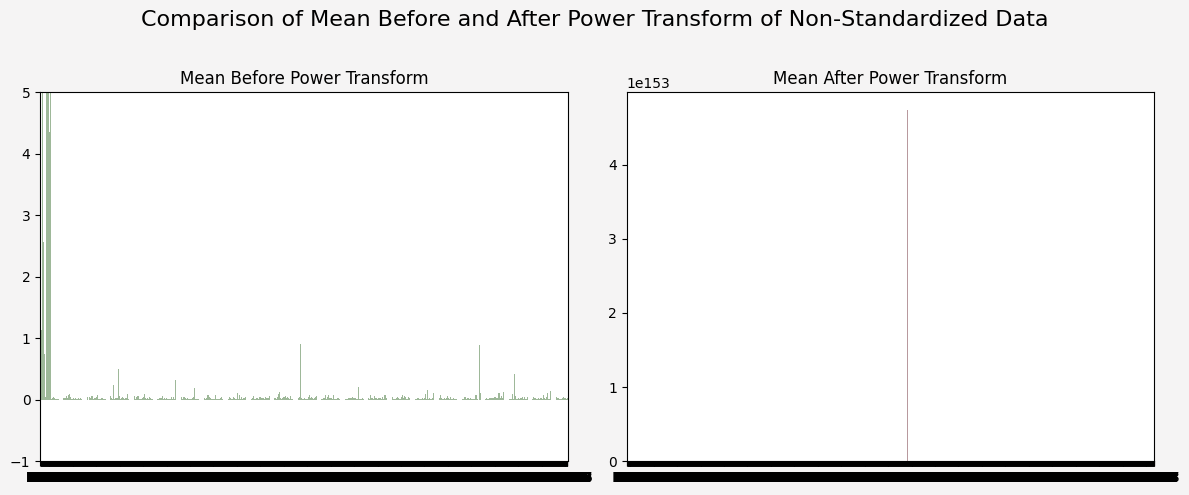

In [138]:
### Check the summary statistics before and after Power Transform ### 

# Summary statistics before transformation
before_summary_mean = np.mean(X_train_df, axis=0)
before_summary_std = np.std(X_train_df, axis=0)

# Summary statistics after transformation
after_summary_mean = np.mean(X_train_power_transformed, axis=0)
after_summary_std = np.std(X_train_power_transformed, axis=0)

# Reset Matplotlib style
plt.style.use('default')

# Plot a side-by-side comparison of mean and standard deviation
plt.figure(figsize=(12, 5), facecolor="#f5f4f4")
plt.title('Power Transform of Non Standardized Data')

plt.subplot(1, 2, 1)
sns.barplot(x=col_names, y=before_summary_mean, color='#9bbd94')
plt.title('Mean Before Power Transform')
plt.ylim(-1,5)

plt.subplot(1, 2, 2)
sns.barplot(x=col_names, y=after_summary_mean, color='#bd949b')
plt.title('Mean After Power Transform')

# Add a main title
plt.suptitle('Comparison of Mean Before and After Power Transform of Non-Standardized Data', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust subplot layout
plt.show()

### 1.3.4. PCA

In [161]:
### Create a PCA instance ###

pca = PCA(n_components=2132) # trying with all the features initially to decide how many to keep
pca_transformed = pca.fit_transform(X_train_df_scaled) # fit and transform the standardized data
print(pca_transformed)
print("PCA transformed shape:", pca_transformed.shape)


[[ 2.14593627e+00  1.37389930e+00  4.02515254e+00 ...  1.26247621e-14
   3.19968735e-14 -1.80092004e-15]
 [-1.65637015e+00 -3.85603741e-01  2.12257269e+00 ... -8.93249778e-16
   5.57604795e-17 -3.66312945e-16]
 [ 9.26028481e-02  6.86331620e-01  8.22130634e-01 ...  1.51363004e-15
   1.34898535e-15  2.98530659e-15]
 ...
 [ 2.48118883e+00  2.71467183e+00  1.26464526e+00 ...  8.33452434e-16
   1.40614126e-17  1.39471017e-15]
 [ 6.88285392e-02 -6.06707828e-01 -1.62530062e+00 ... -3.03899293e-16
   3.03773050e-16  4.75154204e-16]
 [-9.29852668e-01 -2.73645652e+00  2.92829514e-01 ... -1.97352716e-16
   9.72114534e-17  3.08065883e-16]]
PCA transformed shape: (7337, 2132)


[2.58837454e-02 1.30596242e-02 1.25531646e-02 ... 1.87298431e-34
 1.13723415e-34 5.82618692e-35]
[   0    1    2 ... 2129 2130 2131]


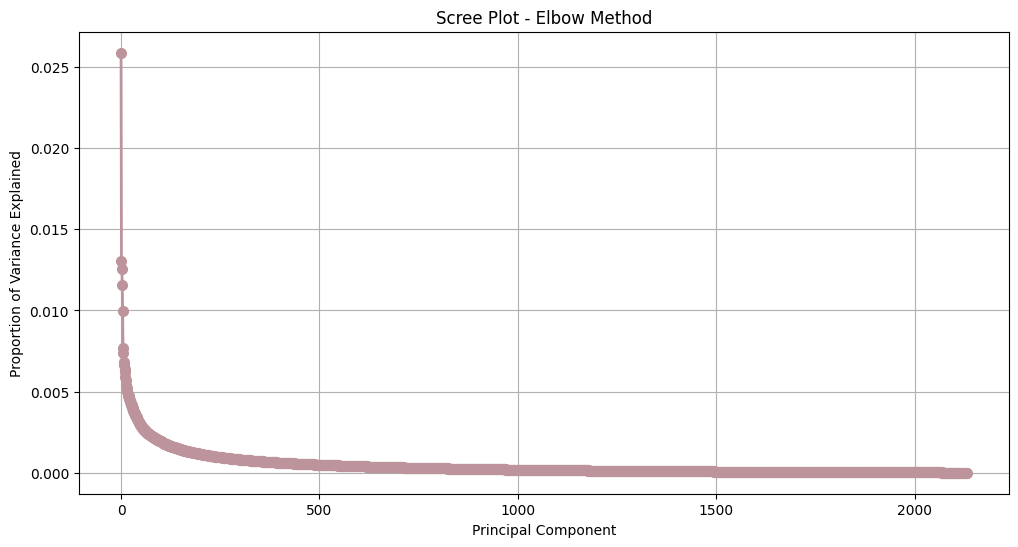

In [162]:
### Proportion of variance explained by each component - Elbow plot ###

# Extract portion of variance explained by each component
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio) 

# Enumerate component numbers
pc_number = np.arange(pca.n_components_)
print(pc_number)

# Scree plot
plt.figure(figsize=(12, 6))
plt.plot(pc_number, variance_ratio, color='#bd949b', marker='o', linestyle='solid', linewidth=2, markersize=7)
plt.title('Scree Plot - Elbow Method')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid()
plt.show()


[5.51916677e+01 2.78469143e+01 2.67669952e+01 ... 3.99374688e-31
 2.42491372e-31 1.24231237e-31]


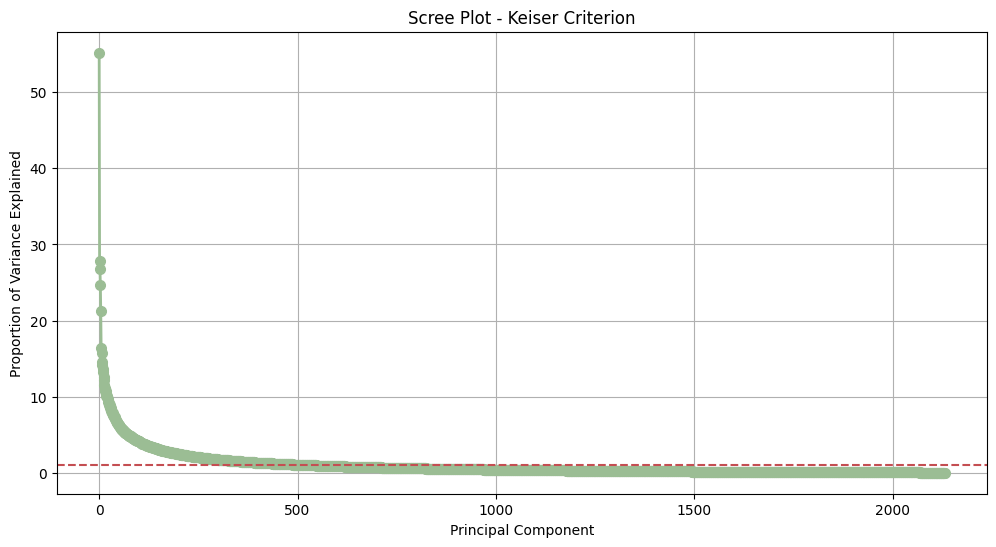

In [163]:
### Alternative way to plot the Scree plot - Keiser criterion ###

# Extract portion of variance explained by each component
variance = pca.explained_variance_
print(variance)

# Alternative screen plot
plt.figure(figsize=(12, 6))
plt.plot(pc_number, variance, color='#9bbd94', marker='o', linestyle='solid', linewidth=2, markersize=7)
plt.title('Scree Plot - Keiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.axhline(y=1, color='r', linestyle='--') 
plt.grid()
plt.show()

[55.19166766 27.8469143  26.76699516 24.69742515 21.20026936 16.38163758
 15.71274449 14.59690254 14.17699412 13.56690929 13.2335215  12.54244506
 12.22738134 11.51911988 11.17768076 10.7906609  10.77770753 10.29367306
 10.1341651  10.02463198  9.96706224  9.70596612  9.50125894  9.29487296
  9.22611993  9.0626011   8.93357215  8.85496213  8.49269442  8.48356703
  8.3940904   8.14375723  7.95304466  7.90238745  7.86750179  7.61888529
  7.53329863  7.46940055  7.36138212  7.28356762  7.1286746   7.09247724
  6.95909347  6.84462972  6.65976512  6.6098243   6.55586888  6.42841501
  6.36361267  6.33182942  6.21351008  6.16953132  6.05887838  6.04176204
  5.88783714  5.85845004  5.80862857  5.78438783  5.67497101  5.63723798
  5.62015366  5.48248608  5.45770444  5.39895494  5.37833508  5.28301036
  5.27416925  5.21712769  5.16760919  5.12507055  5.09504313  5.02933358
  4.9980091   4.96967793  4.94655291  4.88615506  4.87882001  4.81928896
  4.79187034  4.77418409  4.69307073  4.67179919  4

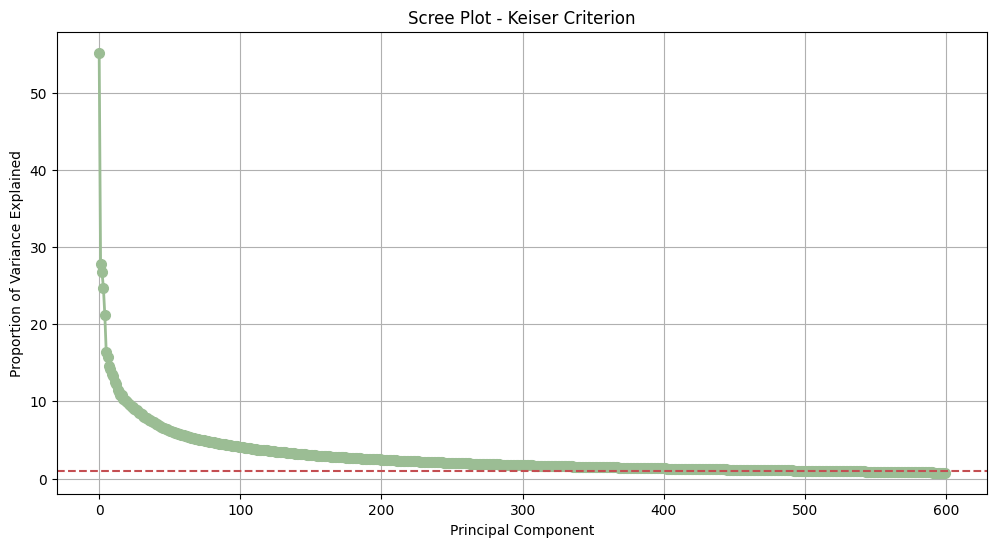

In [170]:
### Scree plot - Keiser criterion with LESS FEATURES ACCORDING TO PLOT ABOVE ###

pca = PCA(n_components=600) # less features according to the plot above
pca_transformed = pca.fit_transform(X_train_df_scaled) # fit and transform the standardized data

# Extract portion of variance explained by each component
variance = pca.explained_variance_
print(variance)

# Enumerate component numbers
pc_number = np.arange(pca.n_components_)
print(pc_number)

# Alternative screen plot
plt.figure(figsize=(12, 6))
plt.plot(pc_number, variance, color='#9bbd94', marker='o', linestyle='solid', linewidth=2, markersize=7)
plt.title('Scree Plot - Keiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.axhline(y=1, color='r', linestyle='--') 
plt.grid()
plt.show()

So, according to the plot above, we should use 400 components???

## 2. Regression models

In [ ]:
# Note to group: I am very confused as to when to split the data. Before or after pre-processing? Help! :(

# from sklearn.model_selection import train_test_split

# X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# List of preprocessed datasets
preprocessed_datasets = [X_train, X_ivs]  # Add more preprocessed datasets if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Regression models to test
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Results storage
results = []

# Iterate over preprocessed datasets
for dataset in preprocessed_datasets:
    # Iterate over regression models
    for model_name, model in models.items():
        # Fit the model
        model.fit(dataset, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Store results
        results.append({
            'Model': model_name,
            'Dataset': 'Preprocessed Dataset',  # Update with the specific preprocessing method
            'MSE': mse,
            'MAE': mae
        })

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', hue='Dataset', data=results_df)
plt.title('Mean Squared Error Comparison Across Models and Datasets')
plt.ylabel('Mean Squared Error')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', hue='Dataset', data=results_df)
plt.title('Mean Absolute Error Comparison Across Models and Datasets')
plt.ylabel('Mean Absolute Error')
plt.show()

### 2.1 Training the models

## 3. Predictions calculation

## 4. Results